In [ ]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sbn

In [ ]:
df = pd.read_excel('default of credit card clients.xls', index_col = 0, header = 1)

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
onehot_columns = ['SEX','EDUCATION','MARRIAGE']
df = pd.get_dummies(df, columns = onehot_columns)
defp = df["default payment next month"]
df.drop("default payment next month",1,inplace = True)
df["default payment next month"] = defp
df.head()


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,1,0,0,0,0,0,1,0,0,1
2,120000,26,-1,2,0,0,0,2,2682,1725,...,1,0,0,0,0,0,0,1,0,1
3,90000,34,0,0,0,0,0,0,29239,14027,...,1,0,0,0,0,0,0,1,0,0
4,50000,37,0,0,0,0,0,0,46990,48233,...,1,0,0,0,0,0,1,0,0,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
df.corr()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default payment next month
LIMIT_BAL,1.000000,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,...,-0.147530,-0.139686,0.026413,0.000509,-0.006122,-0.011299,0.103701,-0.090998,-0.055806,-0.153520
AGE,0.144713,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,...,-0.077626,0.231252,-0.011359,0.001206,0.037679,0.010731,0.449425,-0.466584,0.082771,0.013890
PAY_0,-0.271214,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,...,0.099177,0.058902,-0.027826,-0.009046,-0.005867,-0.005667,-0.016314,0.013173,0.017358,0.324794
PAY_2,-0.296382,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,...,0.122364,0.064590,-0.034226,-0.013767,-0.006203,-0.002481,-0.022525,0.020281,0.011657,0.263551
PAY_3,-0.286123,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,...,0.115644,0.062461,-0.032060,-0.016933,-0.007115,-0.001331,-0.030584,0.027195,0.016646,0.235253
PAY_4,-0.267460,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,...,0.110340,0.058382,-0.032509,-0.012813,-0.006745,-0.005438,-0.030167,0.026955,0.017481,0.216614
PAY_5,-0.249411,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,...,0.103218,0.049577,-0.029120,-0.010543,-0.008871,-0.005292,-0.034081,0.032107,0.011396,0.204149
PAY_6,-0.235195,-0.048773,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.207373,0.226924,...,0.098013,0.041370,-0.025037,-0.019441,-0.012773,-0.004979,-0.031772,0.028763,0.016297,0.186866
BILL_AMT1,0.285430,0.056239,0.187068,0.234887,0.208473,0.202812,0.206684,0.207373,1.000000,0.951484,...,0.030323,-0.022006,0.002970,0.040060,0.017340,-0.017775,0.025264,-0.021347,-0.011401,-0.019644
BILL_AMT2,0.278314,0.054283,0.189859,0.235257,0.237295,0.225816,0.226913,0.226924,0.951484,1.000000,...,0.028716,-0.022761,-0.001686,0.036229,0.016862,-0.015044,0.022429,-0.018339,-0.013383,-0.014193


<AxesSubplot:>

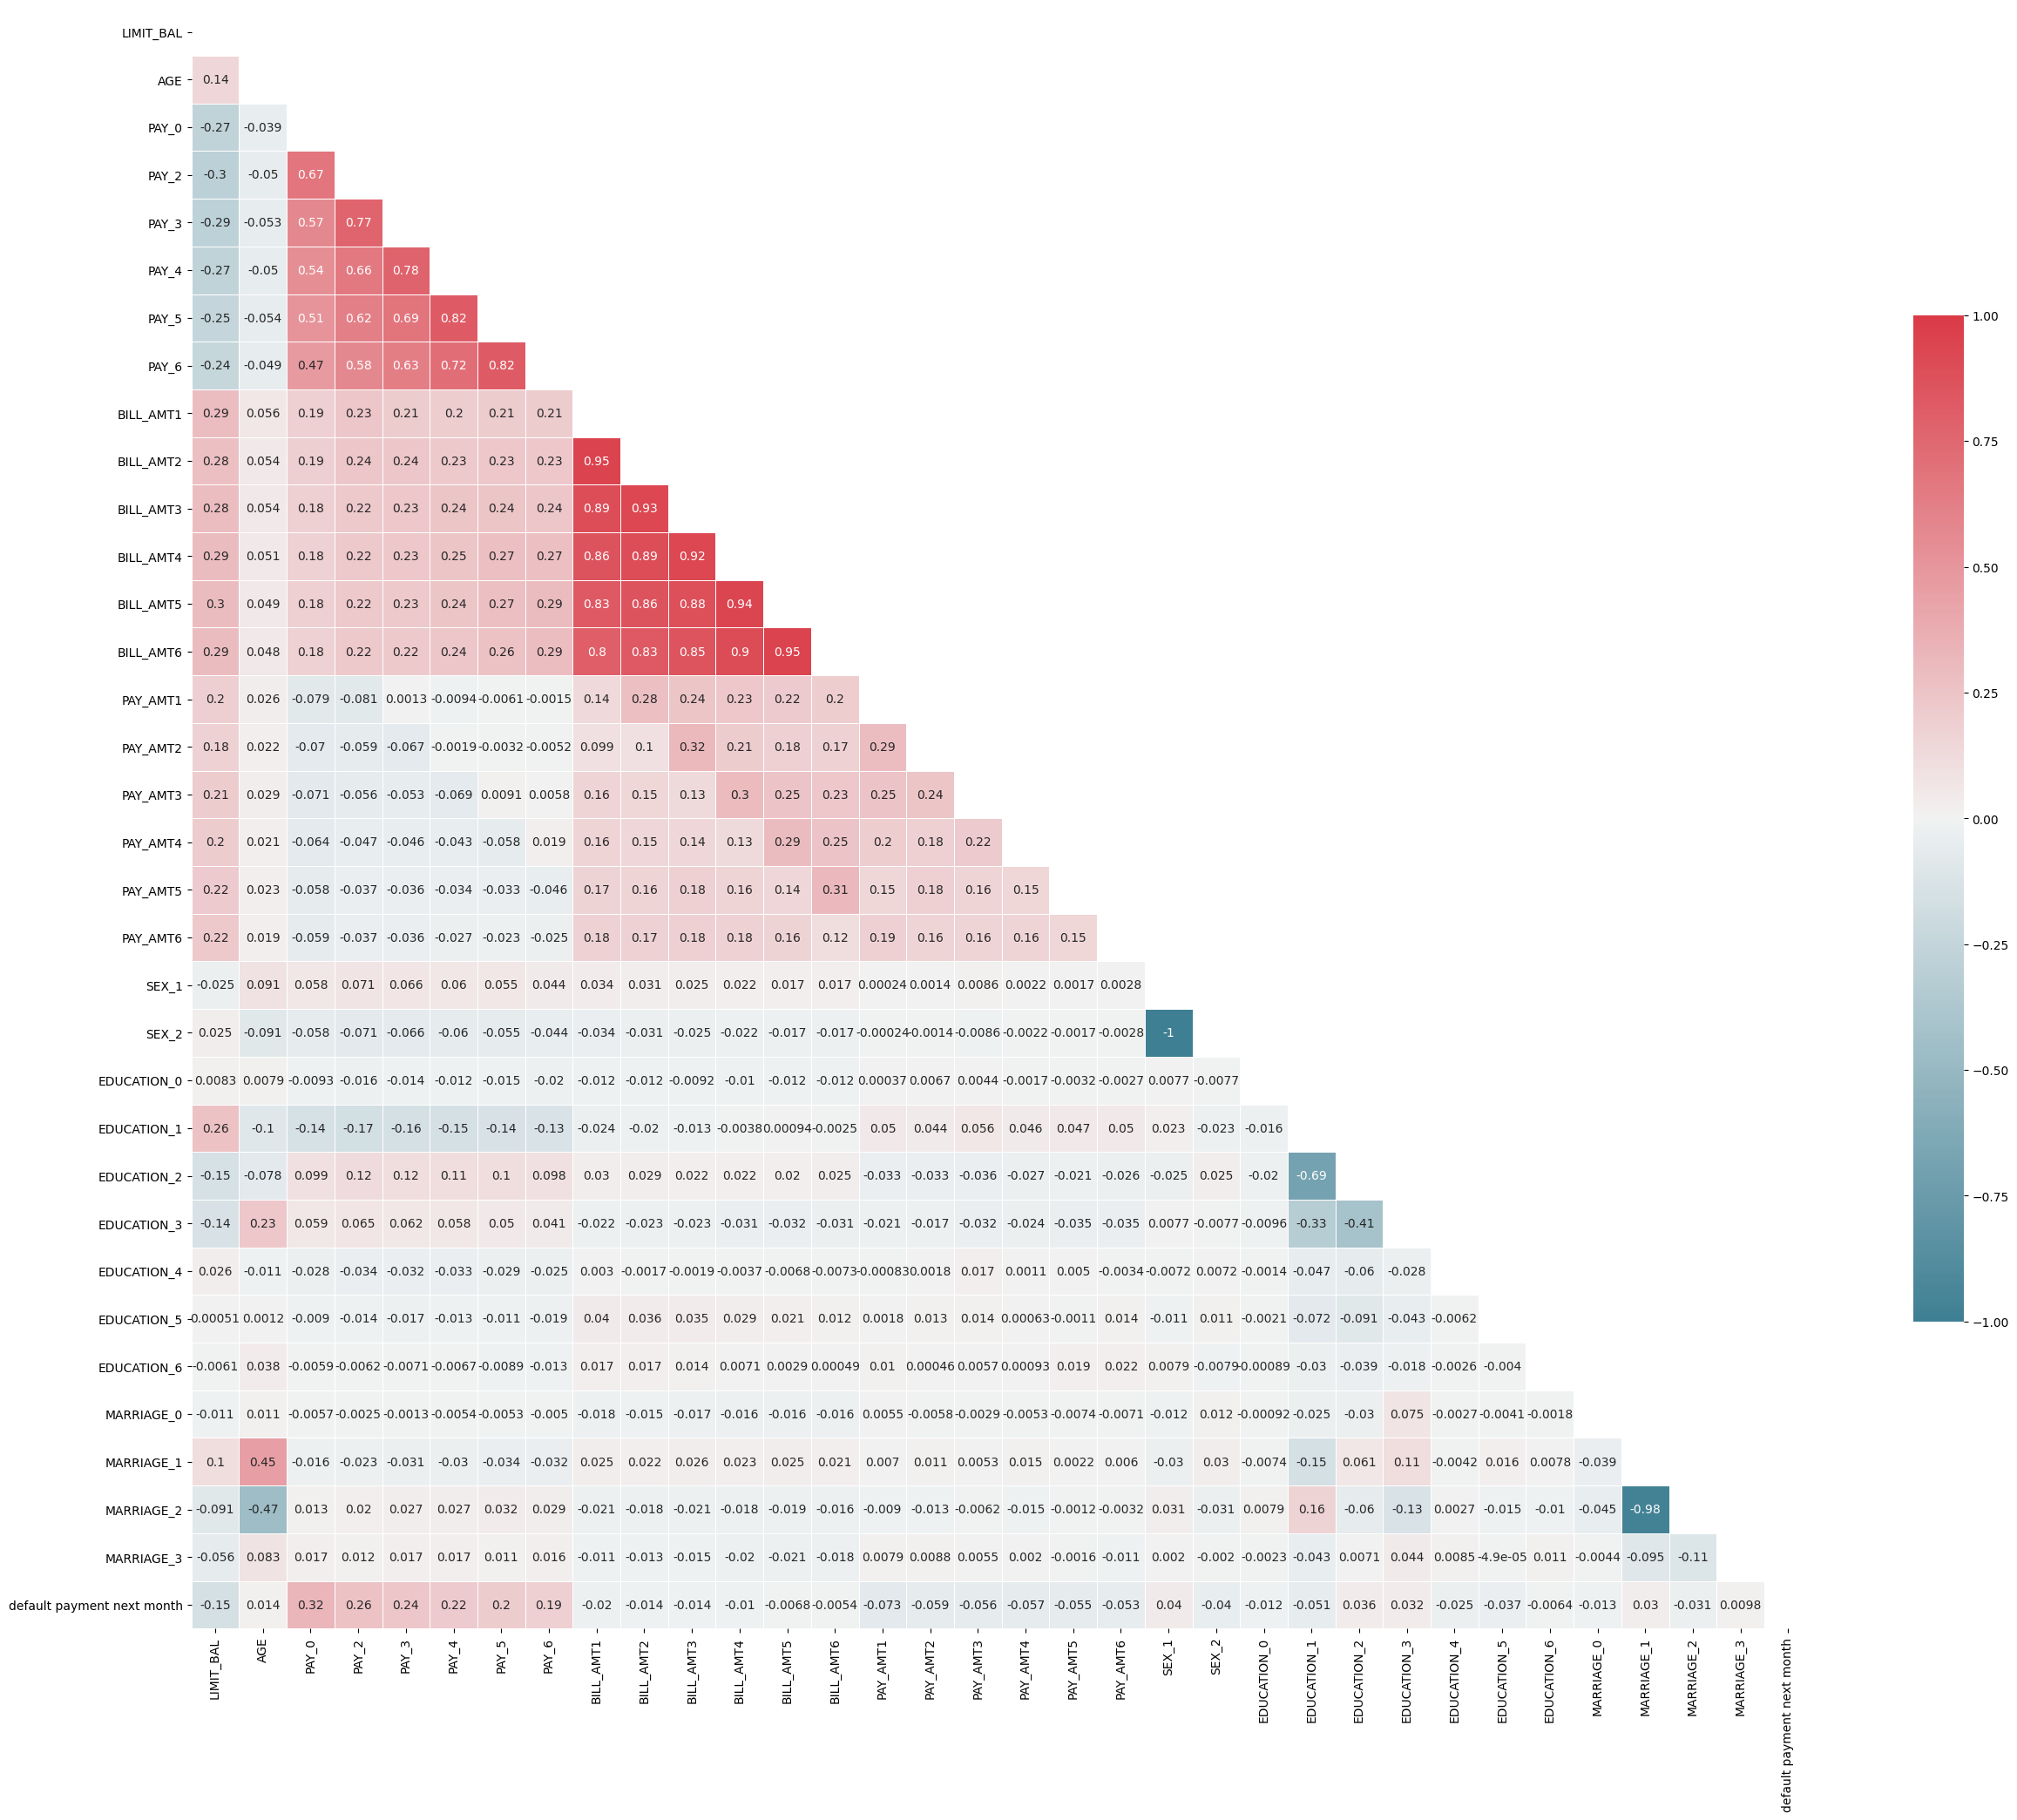

In [ ]:
corr = df.corr().values

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sbn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sbn.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1.0,annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
data_mat = df.values
X = data_mat[:, 0:33] 
Y = data_mat[:, 33] 

In [ ]:
np.set_printoptions(precision=2, suppress=True)
sigmaX = np.std(X,axis=0)
# X = X/sigmaX # If Correlation PCA is required
muX = np.mean(X, axis=0)
n = X.shape[0]-1
print("The size of data set is:", n)
S = np.dot((X - muX).T, (X - muX)) / (n-1)
print('Covariance matrix: \n:')
print(S)

The size of data set is: 29999
Covariance matrix: 
:
[[ 1.68e+10  1.73e+05 -3.95e+04 ...  6.70e+03 -5.89e+03 -7.47e+02]
 [ 1.73e+05  8.50e+01 -4.09e-01 ...  2.06e+00 -2.15e+00  7.87e-02]
 [-3.95e+04 -4.09e-01  1.26e+00 ... -9.13e-03  7.39e-03  2.01e-03]
 ...
 [ 6.70e+03  2.06e+00 -9.13e-03 ...  2.48e-01 -2.42e-01 -4.90e-03]
 [-5.89e+03 -2.15e+00  7.39e-03 ... -2.42e-01  2.49e-01 -5.73e-03]
 [-7.47e+02  7.87e-02  2.01e-03 ... -4.90e-03 -5.73e-03  1.07e-02]]


In [ ]:
# Instantiate PCA
pca = PCA(n_components=33)
muX = np.mean(X, axis=0)
sigmaX = np.std(X,axis=0)
Xn = (X-muX)/sigmaX # One can use the StandardScalar available with ScikitLearn
pca.fit(Xn) 

#Xpca = pca.transform(Xn)

#print("PCA components: %s") # pca.explained_variance_
#print(pca.components_)
print ("Explained Variance Ratio")
print (pca.explained_variance_ratio_)

Explained Variance Ratio
[0.2  0.13 0.07 0.06 0.05 0.05 0.04 0.03 0.03 0.03 0.03 0.03 0.03 0.03
 0.03 0.03 0.02 0.02 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.   0.   0.
 0.   0.   0.   0.   0.  ]


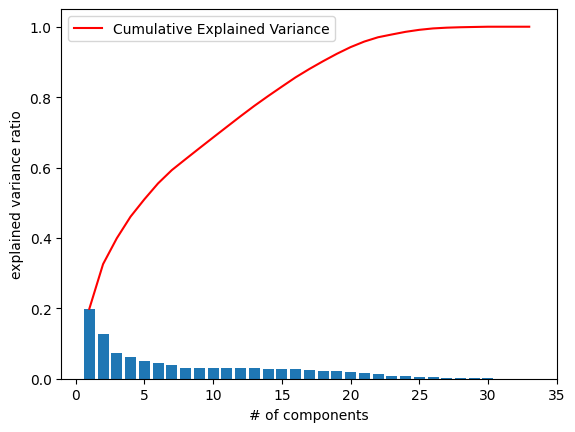

In [ ]:
# Scree-plot: #comp vs eigenvalue
plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.xlabel('# of components')
plt.ylabel('explained variance ratio')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

In [ ]:
total_var = pca.explained_variance_ratio_.sum() * 100
total_var

100.0

In [ ]:
pca_x = pca.transform(Xn)
pca_x

array([[-1.84, -1.01, -1.09, ..., -0.  , -0.  ,  0.  ],
       [-0.73, -2.27,  1.26, ..., -0.  , -0.  , -0.  ],
       [-0.82, -1.26,  0.91, ..., -0.  , -0.  ,  0.  ],
       ...,
       [ 0.46, -3.55,  0.77, ..., -0.  ,  0.  , -0.  ],
       [ 0.66,  0.7 , -1.88, ...,  0.  ,  0.  , -0.  ],
       [-0.03, -0.98, -1.94, ..., -0.  ,  0.  , -0.  ]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# set train and target
y = df["default payment next month"]
X = pca_x
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#K Means
kmeans = KMeans(n_clusters = 2, random_state = 20)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

f1 = f1_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
accuracy_score = accuracy_score(y_test, y_pred)

print(f1)
print(nprec)
print(nrecall)
print(accuracy_score)

TypeError: 'numpy.float64' object is not callable

Classification Report for Logistic Regression with PCA: 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.24      0.36      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Accuracy for Logistic Regression with PCA: 
 0.8113333333333334

 Confusion Matrix for Logistic Regression with PCA: 
 [[4551  136]
 [ 996  317]]
F1 Score for Logistic Regression with PCA: 
 0.35900339750849375
Precision Score for Logistic Regression with PCA: 
 0.6997792494481236
Recall Score for Logistic Regression with PCA: 
 0.24143183549124142
Accuracy for Logistic Regression with PCA: 
 0.8113333333333334


Text(0.5, 1.0, 'Confusion Matrix of tuned Logistic Regression')

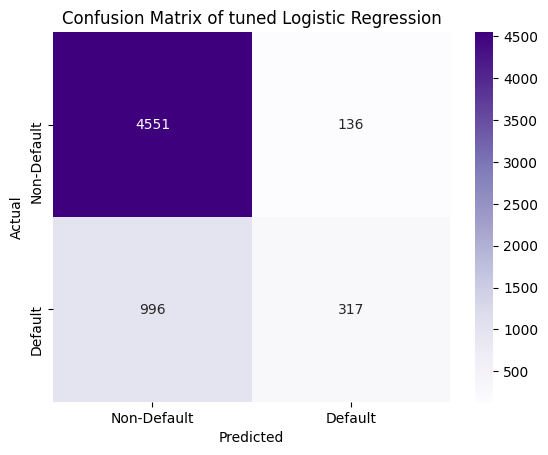

In [ ]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Classification Report for Logistic Regression with PCA: \n", classification_report(y_test,predictions))
print("Accuracy for Logistic Regression with PCA: \n",metrics.accuracy_score(y_test,predictions))

conf_mat = confusion_matrix(y_test, predictions)

print("\n Confusion Matrix for Logistic Regression with PCA: \n", conf_mat)

conf_mat = confusion_matrix(y_test, predictions)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Purples",
xticklabels = ['Non-Default', 'Default'],
yticklabels = ['Non-Default', 'Default'])

nf2 = f1_score(y_test,predictions)
nprec2 = precision_score(y_test,predictions)
nrecall2 = recall_score(y_test,predictions)
print("F1 Score for Logistic Regression with PCA: \n", nf2)
print("Precision Score for Logistic Regression with PCA: \n", nprec2)
print("Recall Score for Logistic Regression with PCA: \n", nrecall2)
print("Accuracy for Logistic Regression with PCA: \n",metrics.accuracy_score(y_test,predictions))

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix of tuned Logistic Regression")

F1 Score for KNN with PCA: 
 0.41806331471135944
Precision Score for KNN with PCA: 
 0.5377245508982036
Recall Score for KNN with PCA: 
 0.341964965727342
Accuracy for KNN with PCA: 
 0.7916666666666666
Classification Report for KNN with PCA: 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      4687
           1       0.54      0.34      0.42      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.63      0.65      6000
weighted avg       0.77      0.79      0.77      6000



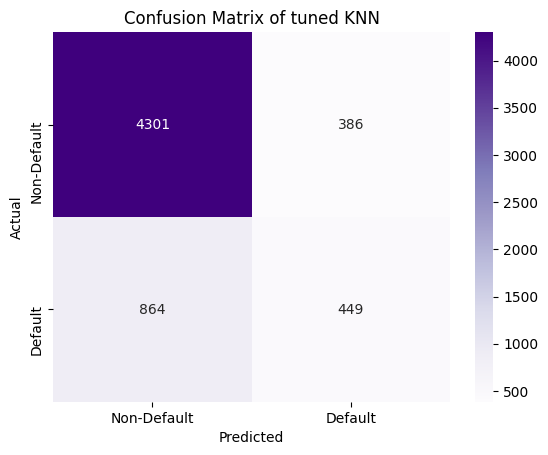

In [ ]:
#K Neighbors
new_knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors = 5, weights= 'uniform')
new_knn.fit(X_train, y_train)
new_pred = new_knn.predict(X_test)

nf1 = f1_score(y_test,new_pred)
nprec = precision_score(y_test,new_pred)
nrecall = recall_score(y_test,new_pred)

print("F1 Score for KNN with PCA: \n", nf1)
print("Precision Score for KNN with PCA: \n", nprec)
print("Recall Score for KNN with PCA: \n", nrecall)
print("Accuracy for KNN with PCA: \n",metrics.accuracy_score(y_test,new_pred))

conf_mat = confusion_matrix(y_test, new_pred)

sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Purples",
xticklabels = ['Non-Default', 'Default'],
yticklabels = ['Non-Default', 'Default'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix of tuned KNN")


print("Classification Report for KNN with PCA: \n", classification_report(y_test, new_pred))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2ef959e-644b-49ba-838b-a88868d44d86' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>